In [21]:
import h5py
import numpy as np

with h5py.File('/Users/daniel/Downloads/embeddings_exp_proteins_clustered_70_filter_lens_25-75_undersampled_1 (1) (1).h5', 'r') as f:
    f.keys()
    
    key_list = list(f.keys())
    count = len(key_list)
    print(count)
    embedding_list = list()

    for i in range(0, count):    
        curr_key = f'Batch {i}'
        curr_batch = f[curr_key][:]
        #print(curr_batch.shape[0])
        if curr_batch.shape[0] != 24:
            print(i)
        embedding_list.extend(curr_batch)

embeddings = np.array(embedding_list)
np.round(embeddings[18514:18517], 3)
#np.save('prott5.npy', embeddings)

1481
771
1480


array([[ 0.009,  0.047, -0.033, ..., -0.009, -0.004, -0.012],
       [ 0.021,  0.043,  0.065, ..., -0.06 ,  0.048, -0.008],
       [ 0.04 ,  0.064,  0.005, ...,  0.006,  0.015,  0.028]],
      shape=(3, 1024), dtype=float32)

In [13]:
import h5py
import numpy as np

with h5py.File('/Users/daniel/Downloads/test.h5', 'r') as f1, h5py.File('/Users/daniel/Downloads/embeddings_c50_15_70.h5', 'r') as f2, h5py.File('embeddings_c50_15_70_final.h5', 'w') as out:
    for key in f1.keys():
        f1.copy(key, out)

    for key in f2.keys():
        f2.copy(key, out)

In [1]:
import numpy as np
embeddings = np.load('prott5.npy')

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score
import pandas as pd

df = pd.read_csv('datasets/curated/exp_proteins_clustered_70_filter_lens_25-75_undersampled.tsv', sep='\t')

y = [enz for enz in df['Enzyme']]

In [32]:
import utils.cross_validation as cv
import torch

In [93]:
embeddings = np.load('/Users/daniel/Desktop/PBL/Task 1/embeddings/embeddings_exp_proteins_clustered_70_filter_lens_25-75_undersampled_s35526.npy')

In [96]:
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)

In [97]:
dataset = Task1Dataset(embeddings_tensor, y_tensor)

In [100]:
criterion = nn.BCELoss()
cv_score = cv.cross_validate(Task1ModelAAIndex, dataset, optim.SGD, criterion, 5, 32, 0.01, 100)

Fold 1
Train loss: 0.6916, Validation loss: 0.6895, Validation acc: 0.5000
Train loss: 0.6861, Validation loss: 0.6802, Validation acc: 0.5000
Train loss: 0.6667, Validation loss: 0.6423, Validation acc: 0.5000
Train loss: 0.5854, Validation loss: 0.4984, Validation acc: 0.4937


ValueError: At least one label specified must be in y_true

In [91]:
import torch.nn as nn
import torch.optim as optim

class Task1ModelAAIndex(nn.Module):
    def __init__(self):
        super().__init__()
        self.le_relu = nn.LeakyReLU()
        self.hidden_layer_1 = nn.Linear(1024, 512, dtype=torch.float32)
        self.dropout_1 = nn.Dropout(0.4)
        self.hidden_layer_2 = nn.Linear(512, 128, dtype=torch.float32)
        self.dropout_2 = nn.Dropout(0.3)
        self.output_layer = nn.Linear(128, 1, dtype=torch.float32)
        
    def forward(self, x):
        h1 = self.le_relu(self.hidden_layer_1(x))
        d1 = self.dropout_1(h1)
        h2 = self.le_relu(self.hidden_layer_2(d1))
        d2 = self.dropout_2(h2)
        return self.output_layer(d2)

In [92]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd

class Task1Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings_tensor, y_tensor)

training_dataset = Task1Dataset(X_train, y_train)
training_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)

model = Task1ModelAAIndex()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
train_losses = []
train_acc = []

for e in range(num_epochs):
    model.train()
    total_loss = 0
    for feats, labels in training_loader:
        optimizer.zero_grad()
        outputs = model(feats)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / (len(training_dataset) / training_loader.batch_size)
    print(avg_loss)
    train_losses.append(avg_loss)
    
    model.eval()
    with torch.no_grad():
        thresh = 0.5
        train_outputs_temp = model(X_train)
        train_outputs = [1 if o > thresh else 0 for o in train_outputs_temp]
        train_acc.append(accuracy_score(y_train, train_outputs))

0.6919603327018258
0.6871672543547315
0.6728998821180087
0.6137453201493241
0.468155529419951
0.3557770244890175
0.2999184210546345
0.27046628228144465
0.25482413860398934
0.24184667242663238
0.23441737378400612
0.22615997153007847
0.22140245111187984
0.2133879964773298
0.210309691050446
0.20426542766816158
0.20167901272208927
0.19778770703647322
0.19385965332901167
0.19179039025356812
0.18764005402082654
0.1855014148322764
0.18427545721243493
0.1815442668838627
0.17949265673378534
0.1770869197698349
0.17459450260580991
0.17333066563467742
0.17174818460163885
0.16829243221363135
0.166492335130334
0.16481125496373736
0.1640732452159278
0.16242372805543212
0.16075064557984933
0.15931456900586097
0.157757967444283
0.15545687764422203
0.1537216762342247
0.15267658866063877
0.15079755542640158
0.14915578615833663
0.14769561594580588
0.14584616373795464
0.1453021728313286
0.1433478355354025
0.14260398131996424
0.14024935348213588
0.13822867331061345
0.13850711285284986
0.13647197326092977
0.

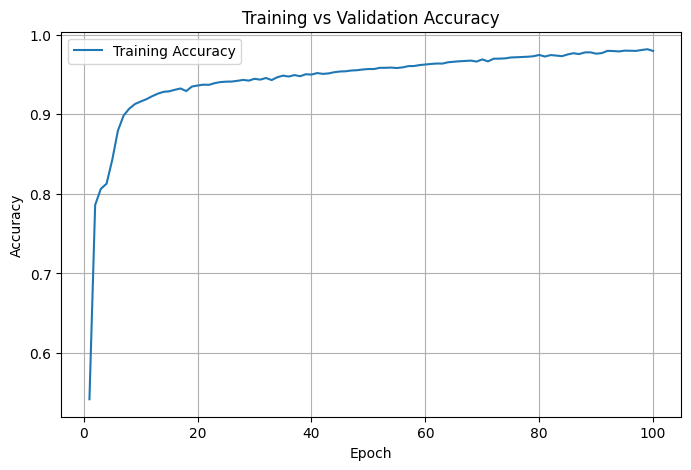

In [45]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, train_acc, label='Training Accuracy')
#plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
#plt.savefig('images/accuracy_tracking/train_val_acc_22.png')
plt.show()

In [46]:
torch.save(model.state_dict(), 'model_test.pth')

In [89]:
from sklearn.metrics import accuracy_score

model1 = Task1ModelAAIndex()
model1.load_state_dict(torch.load('model_test.pth'))

model1.eval()
with torch.no_grad():
    outputs = model1(X_tensor)
    preds = np.round(outputs)
    print(preds)
    print(accuracy_score(y_tensor, preds))

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])
0.875


In [73]:
from utils.pre_processing_task_1 import PreProcessingTask1 as pp
df1 = pd.read_csv('datasets/raw/exp_proteins.tsv', sep='\t')
df1 = pp.add_enz_flag(df1)
df1 = pp.truncate(df1, ['Sequence', 'Enzyme'])
df2 = pd.read_csv('datasets/curated/exp_proteins_clustered_70_filter_lens_25-75_undersampled.tsv', sep='\t')

In [80]:
rand = df1.sample(32, random_state=234)

In [85]:
embeddings = np.load('test_diff.npy')

In [87]:
X_tensor = torch.tensor(embeddings, dtype=torch.float32)
y_tensor = torch.tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=torch.float32).unsqueeze(dim=1)

In [90]:
y_tensor

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])